In [6]:
import matplotlib.pyplot as plt
import pandas as pd

from tools.tools import open_file, DF_TIME, DF_DATA_POINTS, DF_CHANNEL
from hplc.io import load_chromatogram
from hplc.quant import Chromatogram
import numpy as np
from scipy import stats

import os

time = 'time'
signal = 'signal'
base_path = '/home/schwan/syncthing/PD_MN/Experiments/HPLC/20240412_Geobacter_First_Standard/'

files = [
   ('ID',	'Empty',	'Conc'),
   (1,	'001_1_Blank.dat.asc',	np.NaN),
   (2,	'002_13_Riboflavin_50microM.dat.asc',	5 * 10 ** -5),
   (3,	'003_84_Empty.dat.asc',	np.NaN),
   (4,	'004_83_LacAcFormate_0.390625mM.dat.asc',	0.390625),
   (5,	'005_82_LacAcFormate_0.78125mM.dat.asc',	0.78125),
   (6,	'006_81_LacAcFormate_1.5625mM.dat.asc',	1.5625),
   (7,	'007_80_LacAcFormate_3.125mM.dat.asc',	3.125),
   (8,	'008_79_LacAcFormate_6.25mM.dat.asc',	6.25),
   (9,	'009_78_LacAcFormate_12.5mM.asc',	12.5),
   (10,	'010_77_LacAcFormate_25mM.dat.asc',	25),
   (11,	'011_76_LacAcFormate_50mM.dat.asc',	50),
   (12,	'012_75_LacAcFormate_100mM.dat.asc',	100),
   (13,	'013_74_Empty.dat.asc',	np.NaN),
   (14,	'014_2_Acetate_100mM.dat.asc',	100),
   (15,	'015_3_Acetate_10mM.dat.asc',	10),
   (16,	'016_4_Acetate_1mM.dat.asc',	1),
   (17,	'017_5_Lactate_100mM.dat.asc',	100),
   (18,	'018_6_Lactate_10mM.dat.asc',	10),
   (19,	'019_7_Lactate_1mM.dat.asc',	1),
   (20,	'020_1_Empty.dat.asc',	np.NaN),
]
files = [(a, os.path.join(base_path, b), c) for (a, b, c, ) in files]
assert os.path.isfile(files[1][-2]), 'file path issue'


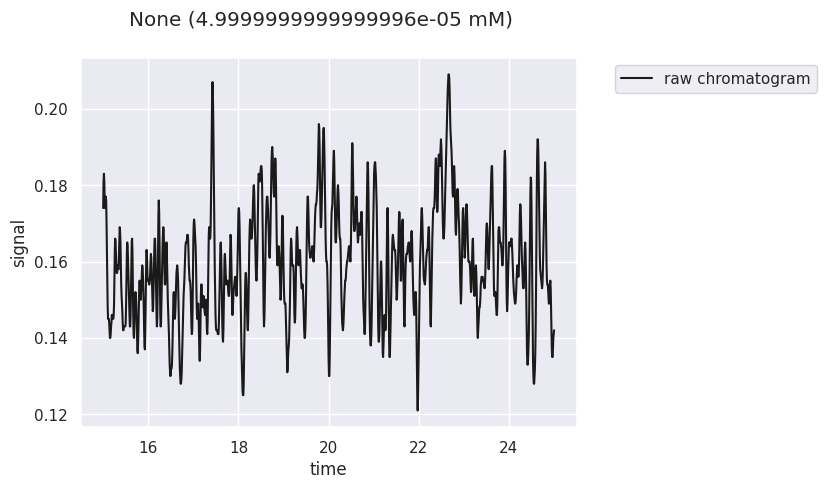

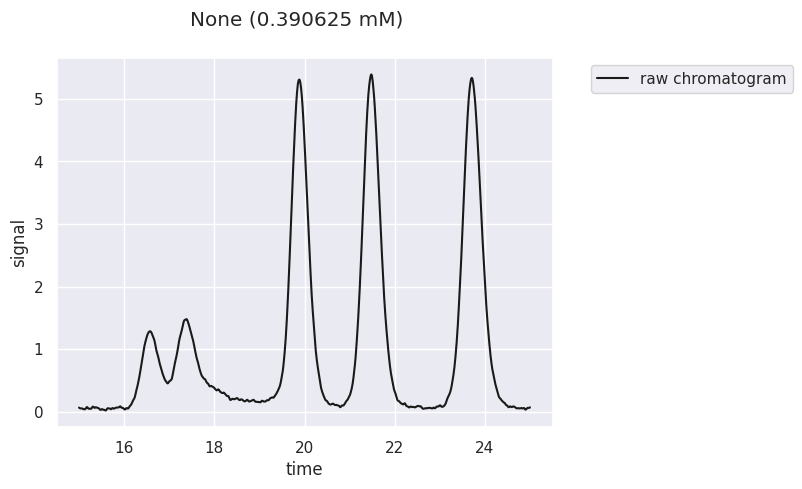

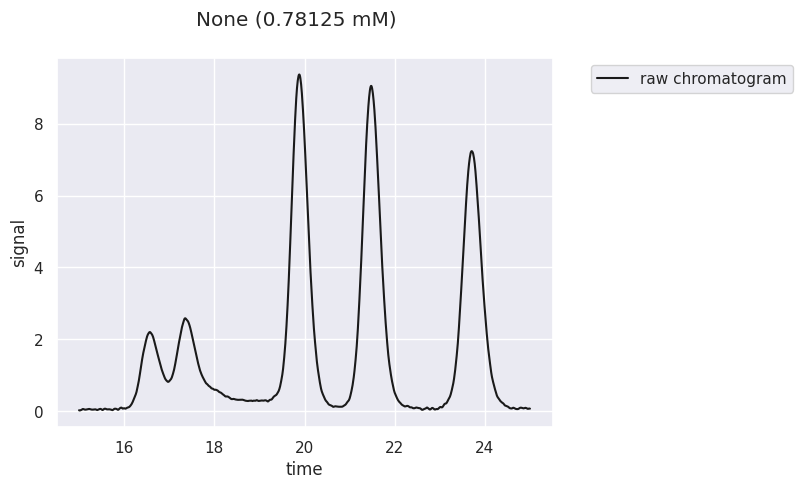

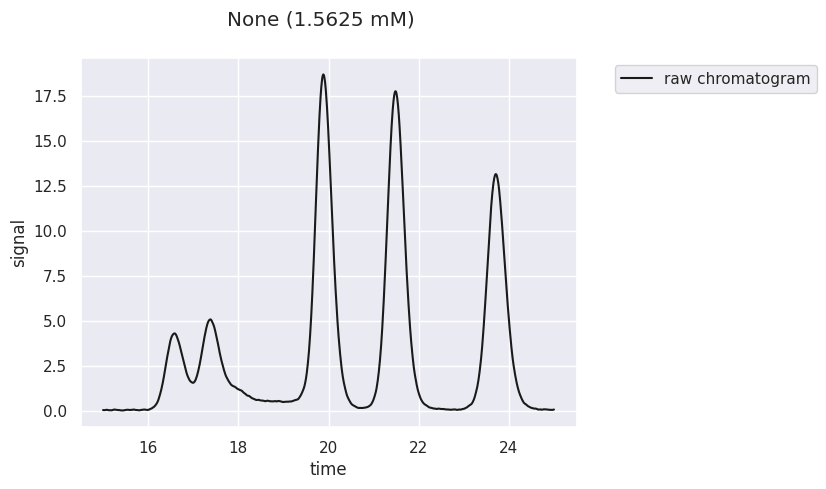

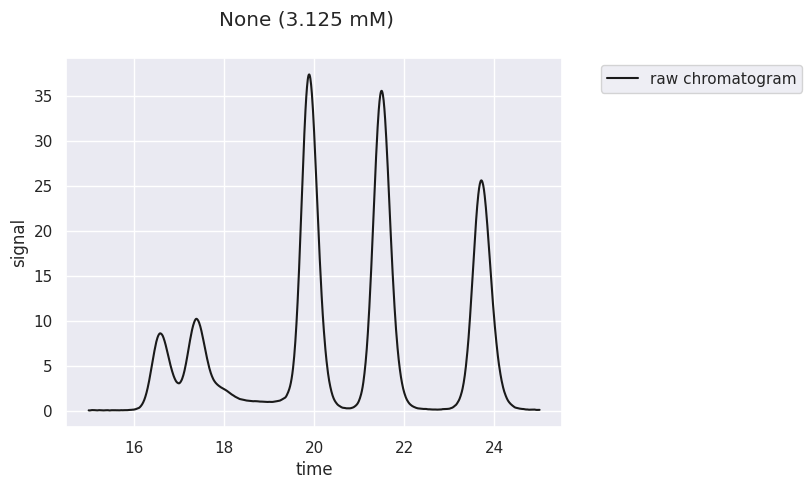

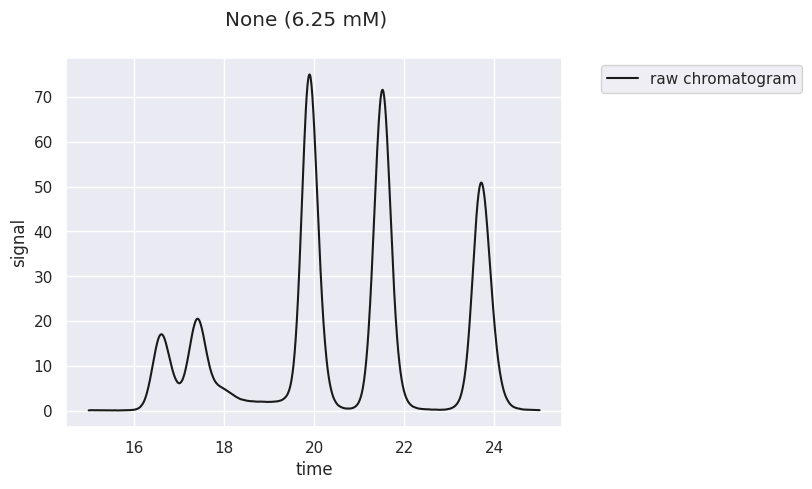

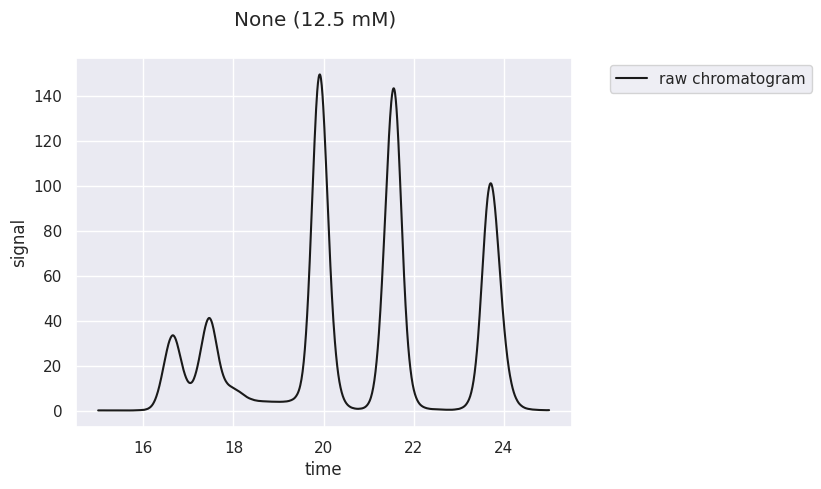

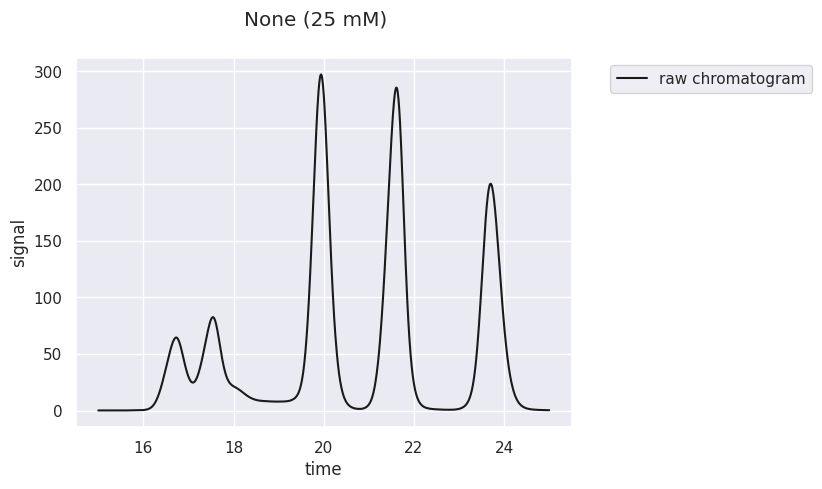

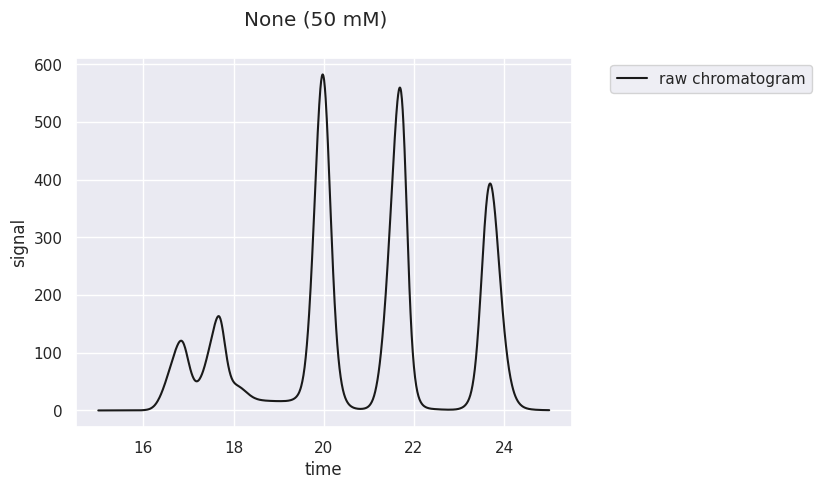

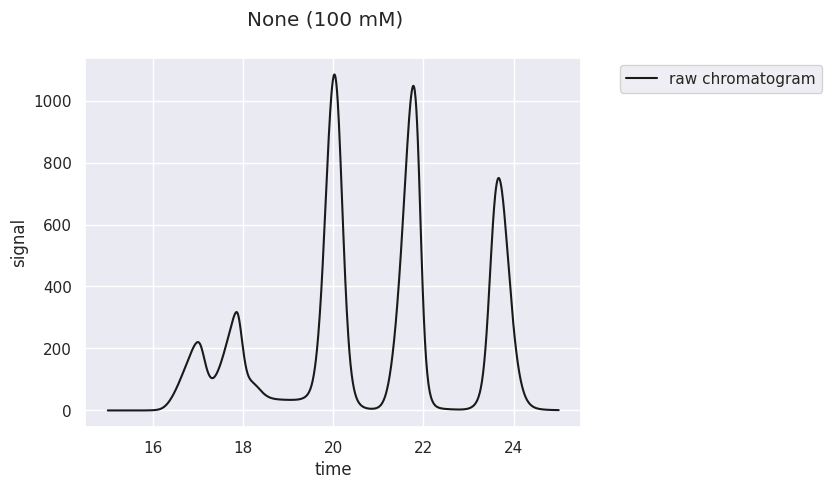

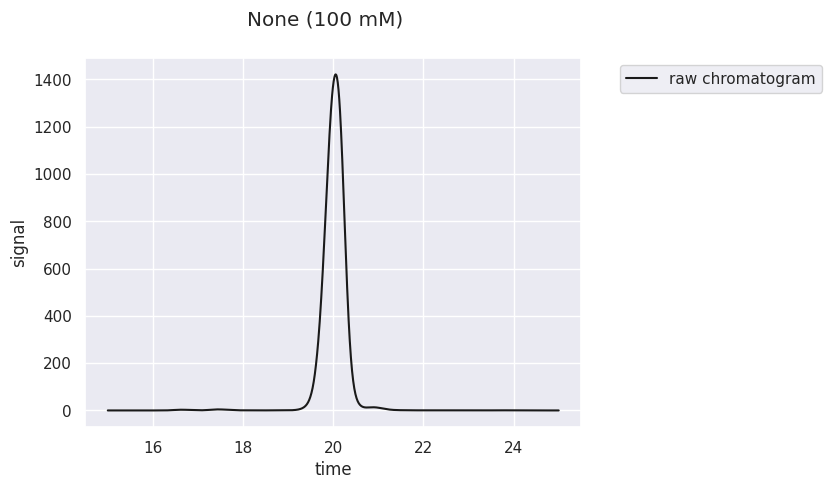

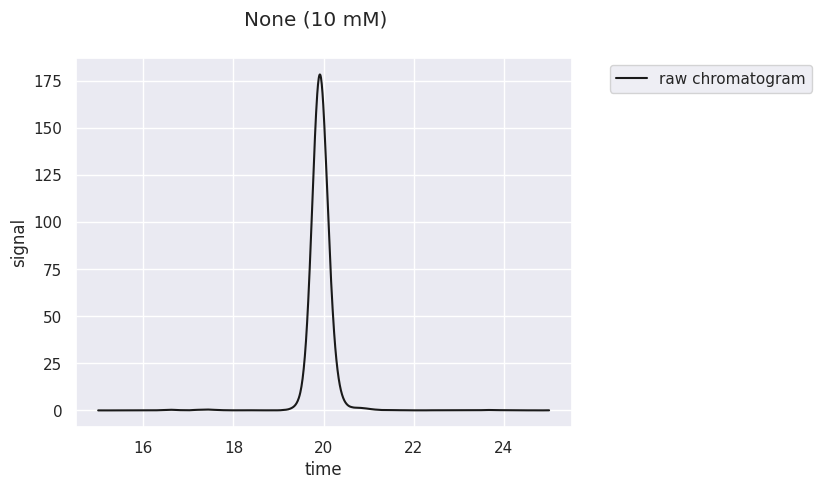

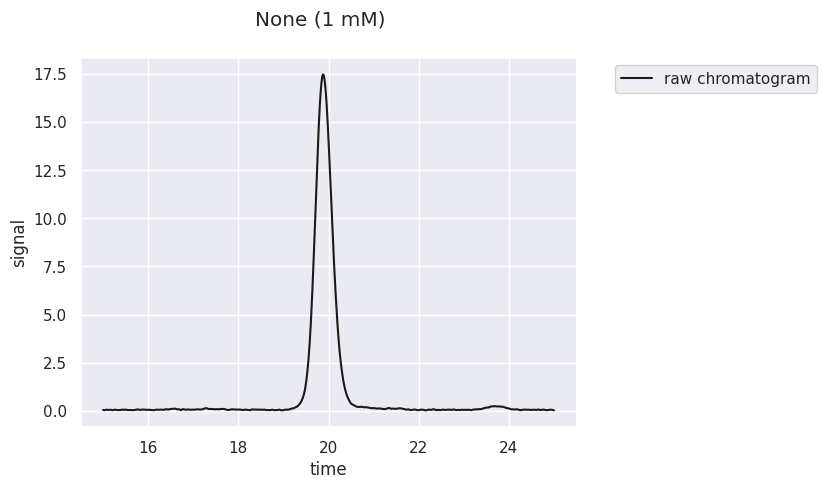

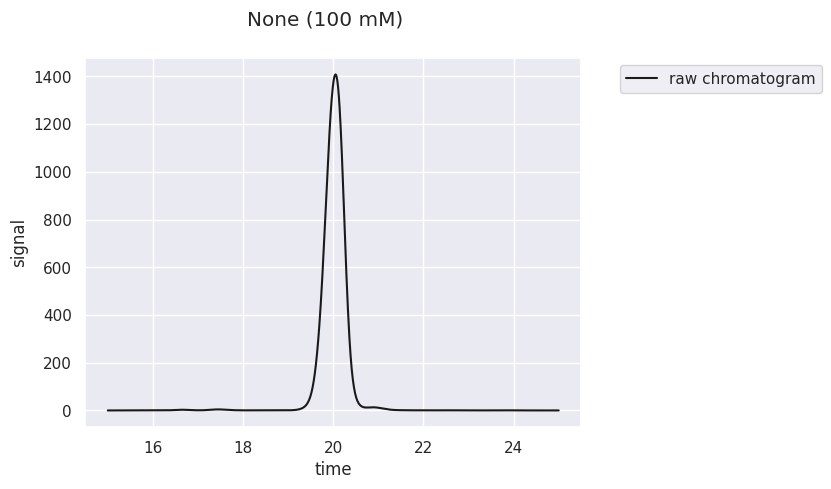

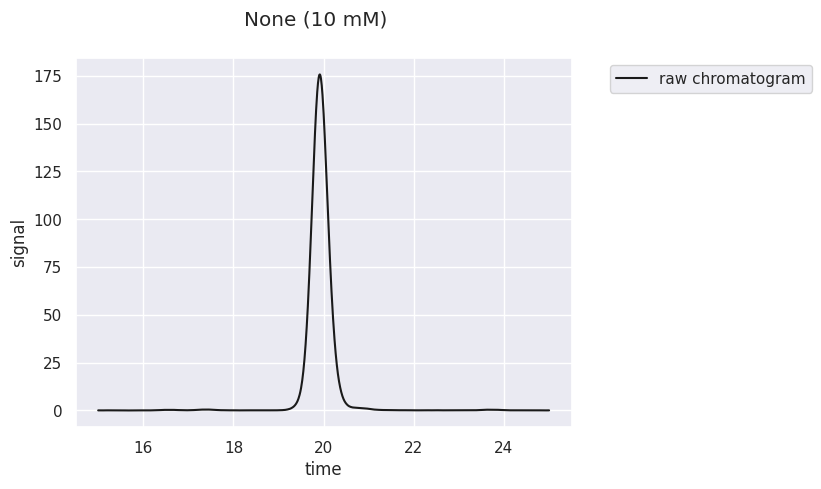

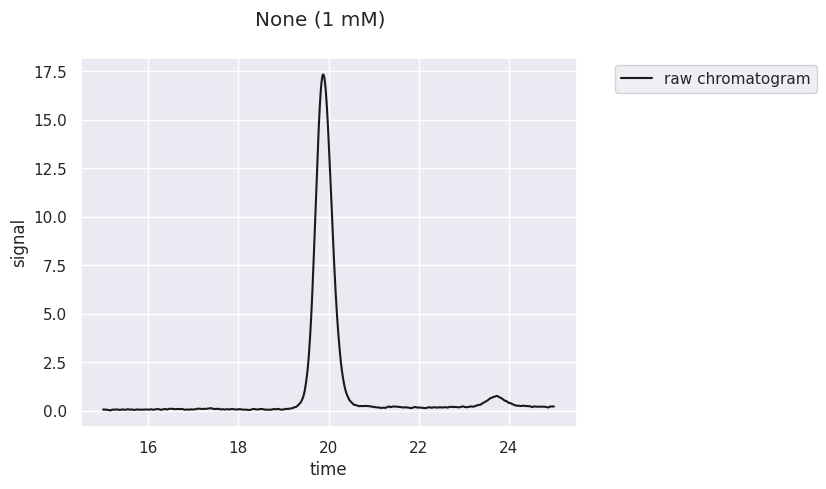

In [11]:
channel = 0
tolerance = .5

all_peaks = None
sample = None

for c_id, path, conc in files[:]:
    if 'Blank' in path:
        continue
    if 'Empty' in path:
        continue
    # _, pos, sample, conc, path = files[i]
    _, df_all = open_file(path)
    
    df_all[DF_TIME] = df_all[DF_TIME] / 60
    df = df_all.loc[df_all[DF_CHANNEL] == channel, [DF_TIME, DF_DATA_POINTS]].rename(columns={
        DF_TIME: time,
        DF_DATA_POINTS: signal,
    })
    df[signal] = df[signal] + abs(df[signal].min())
    chrom = Chromatogram(df)
    # if 'Lactate' in sample:
    #     chrom.crop([19, 20.7])
    # elif 'Acetate' in sample:
    #     
    chrom.crop([15, 25])
    # chrom.show()
    # peaks = chrom.fit_peaks(
    #     # buffer=0,
    #     # prominence=.02, 
    #     known_peaks=[
    #         # lactate,
    #         # succinate,
    #         # 18.9,
    #         # acetate,
    #     ],
    #     # tolerance=tolerance,
    #     verbose=True,
    # )

    title = f"{sample}"
    # print(title)
    if conc is not np.nan:
        title += f" ({conc} mM)"
    # print(peaks.head(100))
    # peaks['Name'] = f"{sample}"
    # peaks['Conc'] = conc
    # if all_peaks is None:
    #     all_peaks = peaks
    # else:
    #     all_peaks = pd.concat([all_peaks, peaks], ignore_index=True)
    # res = title + '\n' + str(peaks.head(100)) + '\n'
    # with open(os.path.join(base_path, '20240311_peak_height_results.txt'), 'a+') as f:
    #     f.write(res)
    fig = chrom.show()[0]
    ax = fig.axes[0]
    # for i in [
    #         acetate,
    #         lactate,
    #         succinate,
    #         18.9,
    #     ]:
    #     ax.axvline(i)

    fig.suptitle(title)
    # fig.show()
# all_peaks.to_csv(os.path.join(base_path, f'standard_curve.csv'))